<a href="https://colab.research.google.com/github/harsh-kmr/Brain-Tumor-44-Classes/blob/main/Brain_Tumor_Type_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import and install

In [1]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import zipfile
import tensorflow as tf
import os
import numpy as np
import gdown
import shutil
import math
from tensorflow import keras
import matplotlib.pyplot as plt

## download dataset 

In [3]:
directory = "/content/brain_tumor"
os.makedirs(directory)

In [4]:
id = "1EdxItCK11ZsPSXTH3_lbzBCeA_7rBxsM"
output = "brain_tummor.zip"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EdxItCK11ZsPSXTH3_lbzBCeA_7rBxsM
To: /content/brain_tummor.zip
100%|██████████| 197M/197M [00:01<00:00, 103MB/s]


'brain_tummor.zip'

In [5]:
path_to_downloaded_file = "/content/" + output

path_to_downloaded_file

'/content/brain_tummor.zip'

In [6]:
with zipfile.ZipFile(path_to_downloaded_file, 'r') as zip_ref:
    zip_ref.extractall(directory)

In [7]:
def count_image(ROOT_DIR):
  number_of_images = {}
  for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
  return number_of_images

In [8]:
image_count = count_image("/content/brain_tumor")

In [9]:
image_count.items()

dict_items([('Astrocitoma T1', 176), ('Granuloma T1', 30), ('_NORMAL T1', 251), ('Meduloblastoma T2', 41), ('Carcinoma T1', 66), ('Germinoma T2', 33), ('Ganglioglioma T1', 20), ('Schwannoma T1', 148), ('Papiloma T1C+', 108), ('Neurocitoma T1C+', 223), ('Meningioma T1', 272), ('Ependimoma T2', 57), ('Glioblastoma T2', 55), ('Ependimoma T1C+', 48), ('Tuberculoma T1', 28), ('Granuloma T2', 17), ('Glioblastoma T1', 55), ('Oligodendroglioma T1C+', 72), ('Schwannoma T2', 123), ('Carcinoma T2', 73), ('Papiloma T2', 63), ('Meduloblastoma T1C+', 67), ('Ganglioglioma T2', 23), ('_NORMAL T2', 271), ('Tuberculoma T1C+', 84), ('Neurocitoma T2', 104), ('Germinoma T1C+', 40), ('Meduloblastoma T1', 23), ('Neurocitoma T1', 130), ('Germinoma T1', 27), ('Astrocitoma T1C+', 233), ('Schwannoma T1C+', 194), ('Tuberculoma T2', 33), ('Oligodendroglioma T2', 66), ('Carcinoma T1C+', 112), ('Meningioma T2', 233), ('Glioblastoma T1C+', 94), ('Meningioma T1C+', 369), ('Ependimoma T1', 45), ('Astrocitoma T2', 171),

In [10]:
total_images=0
for value in image_count.values():
  total_images += value

total_images

4479

## divide the dataset

lets redivide it such that :


*   70% train
*   15% val
*   15 test



In [11]:
ROOT_DIR = "/content/braintumor/"

os.makedirs(ROOT_DIR+"/train")
os.makedirs(ROOT_DIR+"/val")
os.makedirs(ROOT_DIR+"/test")

In [12]:
for key in image_count.keys():
  os.makedirs(ROOT_DIR+"/test/"+key)
  os.makedirs(ROOT_DIR+"/train/"+key)
  os.makedirs(ROOT_DIR+"/val/"+key)

In [13]:
test_count = {}
train_count = {}
for key in image_count.keys():
    test_count[key] = math.ceil(image_count[key] * 0.15)
    train_count[key] = image_count[key]- 2* test_count[key]

In [14]:
test_count.items()

dict_items([('Astrocitoma T1', 27), ('Granuloma T1', 5), ('_NORMAL T1', 38), ('Meduloblastoma T2', 7), ('Carcinoma T1', 10), ('Germinoma T2', 5), ('Ganglioglioma T1', 3), ('Schwannoma T1', 23), ('Papiloma T1C+', 17), ('Neurocitoma T1C+', 34), ('Meningioma T1', 41), ('Ependimoma T2', 9), ('Glioblastoma T2', 9), ('Ependimoma T1C+', 8), ('Tuberculoma T1', 5), ('Granuloma T2', 3), ('Glioblastoma T1', 9), ('Oligodendroglioma T1C+', 11), ('Schwannoma T2', 19), ('Carcinoma T2', 11), ('Papiloma T2', 10), ('Meduloblastoma T1C+', 11), ('Ganglioglioma T2', 4), ('_NORMAL T2', 41), ('Tuberculoma T1C+', 13), ('Neurocitoma T2', 16), ('Germinoma T1C+', 6), ('Meduloblastoma T1', 4), ('Neurocitoma T1', 20), ('Germinoma T1', 5), ('Astrocitoma T1C+', 35), ('Schwannoma T1C+', 30), ('Tuberculoma T2', 5), ('Oligodendroglioma T2', 10), ('Carcinoma T1C+', 17), ('Meningioma T2', 35), ('Glioblastoma T1C+', 15), ('Meningioma T1C+', 56), ('Ependimoma T1', 7), ('Astrocitoma T2', 26), ('Papiloma T1', 10), ('Granulom

In [15]:
ROOT_DIR2 = "/content/brain_tumor"

In [16]:
for key in test_count.keys():
    src_dir = os.path.join(ROOT_DIR2, key)
    dest_dir = os.path.join(ROOT_DIR, "test", key)
    images = os.listdir(src_dir)
    # Move 15% of the images from the train directory to the test directory
    for i in range(test_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

    dest_dir = os.path.join(ROOT_DIR, "val", key)
    images = os.listdir(src_dir)
    for i in range(test_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

    dest_dir = os.path.join(ROOT_DIR, "train", key)
    images = os.listdir(src_dir)
    for i in range(train_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

## image

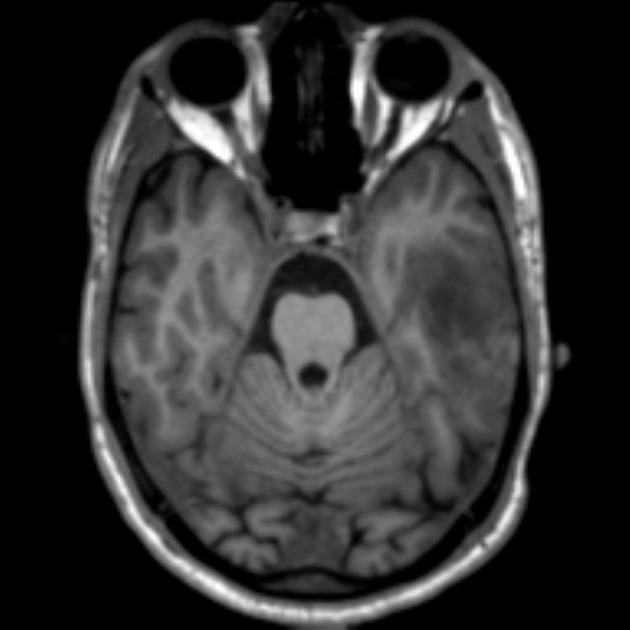

In [17]:
from PIL import Image
img_path = "/content/braintumor/test/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg"

image = Image.open(img_path)

image.show()

In [18]:
image = np.array(image)
image.shape

(630, 630)

In [19]:
from PIL import Image

ROOT_DIR = "/content/braintumor"

min_width, min_height = float('inf'), float('inf')

for key in image_count.keys():
    for img_name in os.listdir(os.path.join(ROOT_DIR, "train", key)):
        img_path = os.path.join(ROOT_DIR, "train", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

    for img_name in os.listdir(os.path.join(ROOT_DIR, "val", key)):
        img_path = os.path.join(ROOT_DIR, "val", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

    for img_name in os.listdir(os.path.join(ROOT_DIR, "test", key)):
        img_path = os.path.join(ROOT_DIR, "test", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

print("Minimum image size:", min_width, "x", min_height)


Minimum image size: 305 x 347


## preprocessing

In [20]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 1
EPOCHS = 50

In [21]:
Train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/train",
    label_mode= "categorical",
    seed = 42,
    color_mode= "grayscale",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3097 files belonging to 44 classes.


In [22]:
class_names = Train_ds.class_names
class_names

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

In [23]:
len(Train_ds)

97

In [24]:
Test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/test",
    label_mode= "categorical",
    seed = 42,
    color_mode= "grayscale",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 690 files belonging to 44 classes.


In [25]:
Val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/val",
    label_mode= "categorical",
    seed = 42,
    color_mode= "grayscale",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 691 files belonging to 44 classes.


In [26]:
for image_batch, label_batch in Train_ds.take(1):
  print(image_batch.shape) #batch,dimension,dimension,grayscale
  print(label_batch)

(32, 256, 256, 1)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(32, 44), dtype=float32)


In [27]:
print(image_batch[0].numpy().shape)

(256, 256, 1)


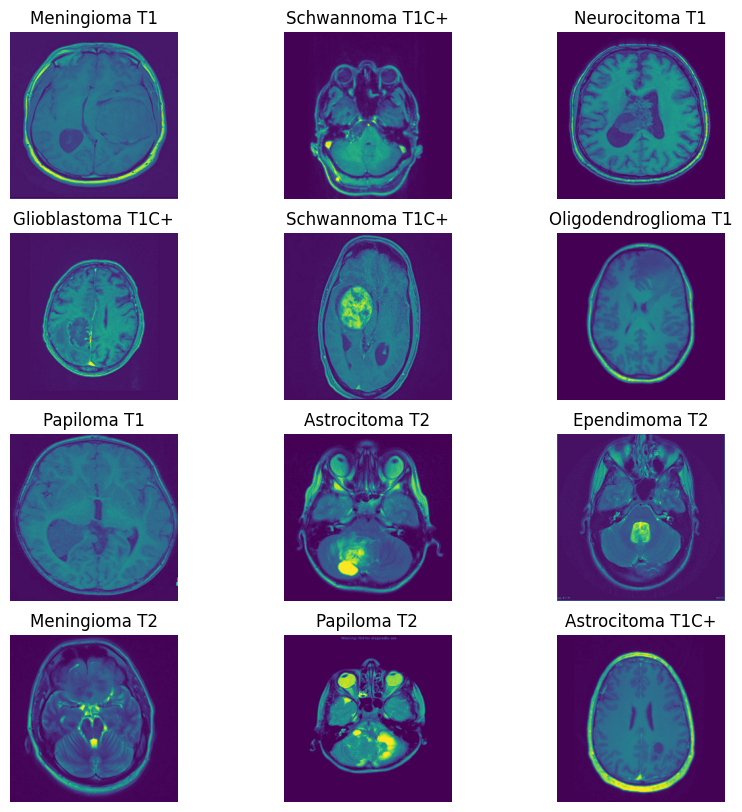

In [28]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in Train_ds.take(1):
  for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(label_batch[i])])
      plt.axis("off")

In [29]:
Train_ds = Train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Val_ds = Val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_ds = Test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## build a *model*

In [30]:
resize_and_rescale = tf.keras.Sequential([
    keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.Rescaling(1.0/255)
])

In [31]:
data_augmentation = tf.keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2)
])

In [32]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
output_shape = len(class_names)

In [33]:
model = keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(filters= 16, kernel_size= (3,3), input_shape= input_shape, activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters= 128, kernel_size= (3,3), activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(output_shape, activation = 'sigmoid'),
])

model.build(input_shape = input_shape)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 1)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (32, 127, 127, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        4640      
                                                      

In [35]:
model.compile(optimizer='adam', loss= keras.losses.CategoricalCrossentropy(from_logits = False), metrics= ['accuracy'] )

In [36]:
history = model.fit(
    Train_ds,
    batch_size = BATCH_SIZE,
    validation_data = Val_ds,
    verbose=1,
    epochs = 50
)

Epoch 1/50
97/97 [==============================] - 29s 72ms/step - loss: 3.5134 - accuracy: 0.0881 - val_loss: 3.4747 - val_accuracy: 0.1780
Epoch 2/50
97/97 [==============================] - 5s 52ms/step - loss: 3.1932 - accuracy: 0.1566 - val_loss: 3.0569 - val_accuracy: 0.2069
Epoch 3/50
97/97 [==============================] - 5s 53ms/step - loss: 2.8190 - accuracy: 0.2506 - val_loss: 2.7359 - val_accuracy: 0.2648
Epoch 4/50
97/97 [==============================] - 5s 52ms/step - loss: 2.5168 - accuracy: 0.3303 - val_loss: 2.4150 - val_accuracy: 0.3560
Epoch 5/50
97/97 [==============================] - 5s 55ms/step - loss: 2.2442 - accuracy: 0.3930 - val_loss: 2.2170 - val_accuracy: 0.4255
Epoch 6/50
97/97 [==============================] - 5s 55ms/step - loss: 2.0285 - accuracy: 0.4362 - val_loss: 2.0648 - val_accuracy: 0.4385
Epoch 7/50
97/97 [==============================] - 5s 54ms/step - loss: 1.9046 - accuracy: 0.4814 - val_loss: 1.9416 - val_accuracy: 0.4385
Epoch 8/50
9

In [37]:
scores = model.evaluate(Test_ds)

22/22 [==============================] - 2s 17ms/step - loss: 1.0363 - accuracy: 0.7493


In [38]:
scores

[1.036268711090088, 0.7492753863334656]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

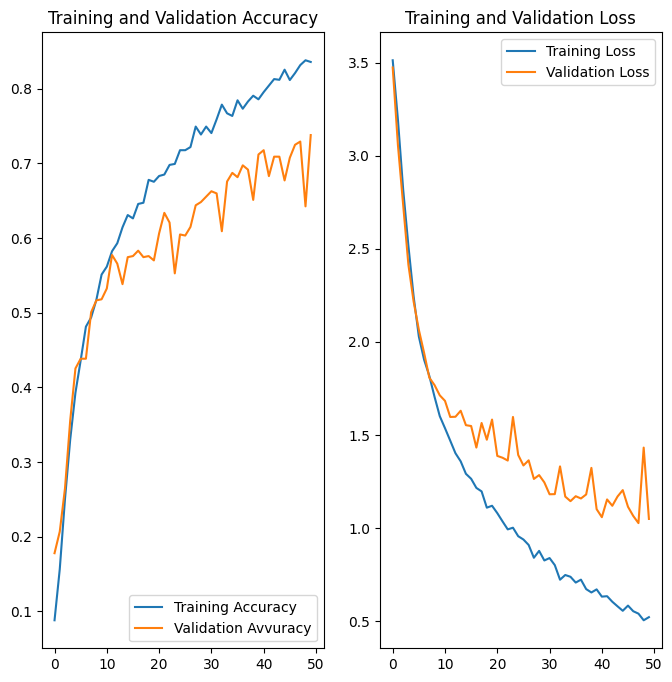

In [40]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label = 'Training Accuracy')
plt.plot(range(50), val_acc, label = 'Validation Avvuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50), loss, label = 'Training Loss')
plt.plot(range(50), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

first image to predict
first image's actual label: Carcinoma T1
1/1 [==============================] - 0s 113ms/step
first image's Predicted label: Carcinoma T1


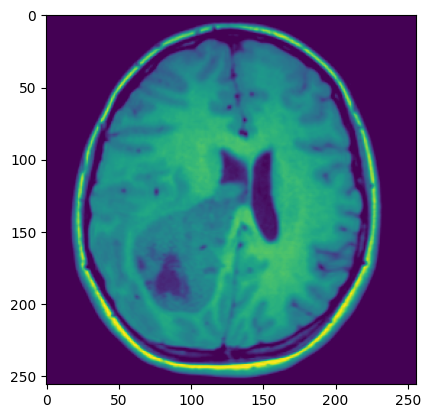

In [41]:
for images_batch, labels_batch in Test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:",class_names[np.argmax(first_label)])

  batch_prediction = model.predict(images_batch)
  print("first image's Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


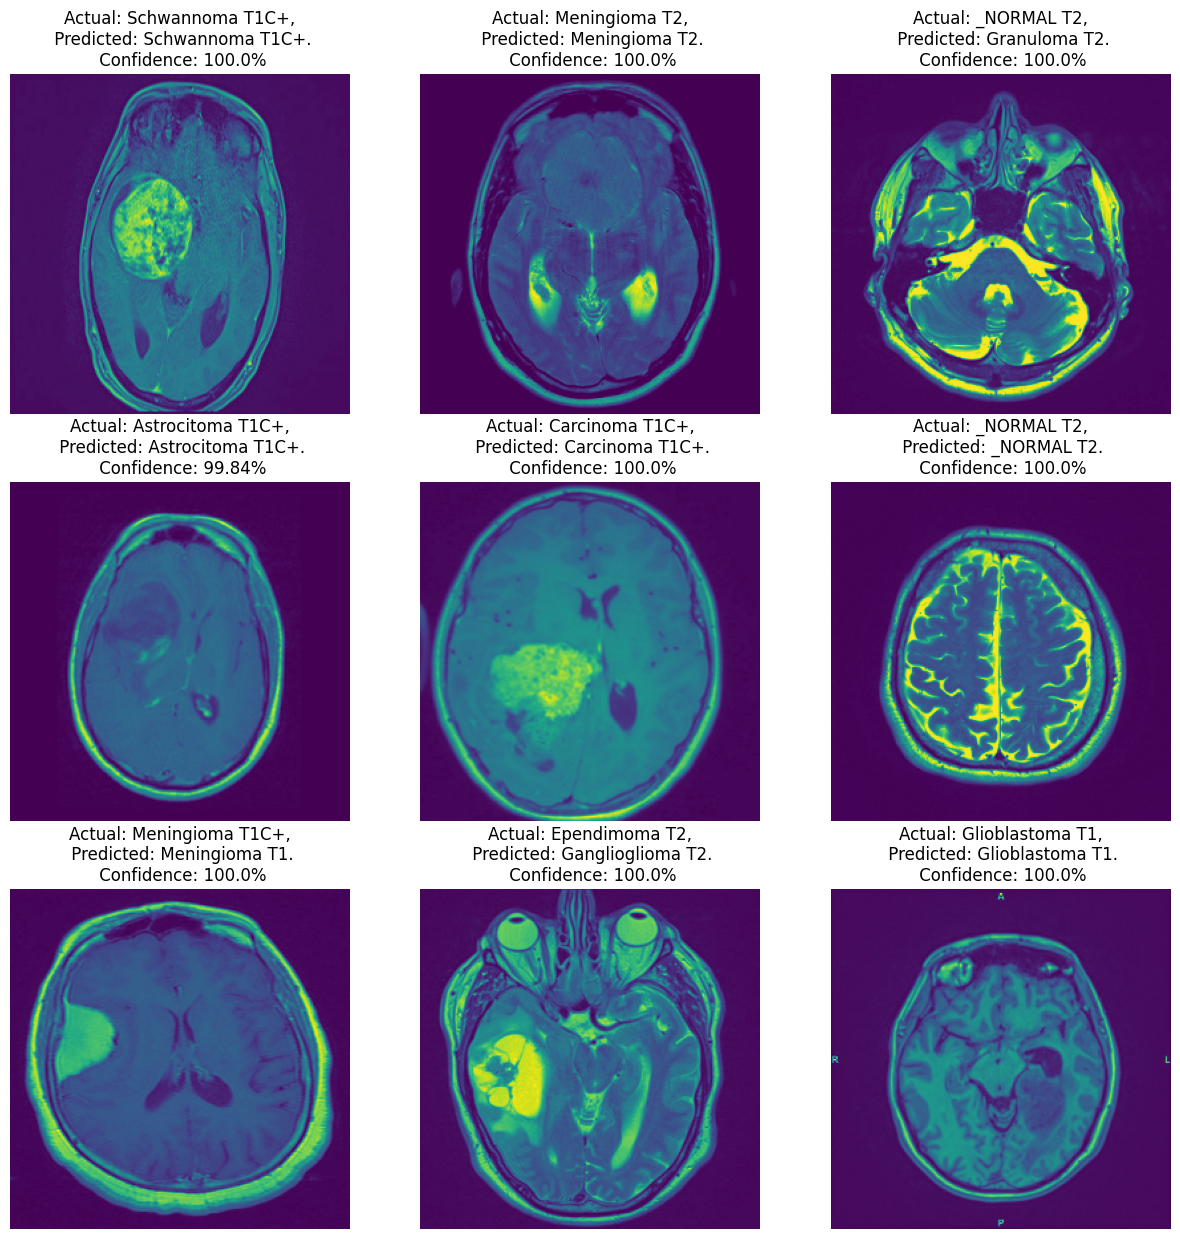

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in Test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")